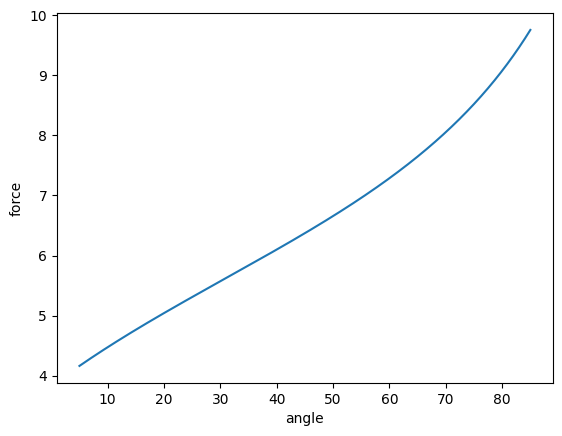

In [59]:
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt

def find_closest_index(array, n, t):
    # Convert array to a NumPy array if it's not already one
    array = np.asarray(array)
    
    # Calculate absolute differences between array elements and target number n
    differences = np.abs(array - n)
    
    # Find indices where the difference is within the threshold t
    within_threshold_indices = np.where(differences <= t)[0]
    
    # If no values are within the threshold, return None
    if len(within_threshold_indices) == 0:
        return None
    
    # Find the index of the minimum difference within the threshold
    closest_index = within_threshold_indices[np.argmin(differences[within_threshold_indices])]
    
    return closest_index

# L = 10e-2
# l = 0.75 * L
# b = 0.5e-2
# h = 0.5e-2
# I = (b * h**3) / 12
# E = 2900e6
# mu = 0.5

L = 5e-2
l = 0.8 * L
b = 0.9e-2
h = 0.25e-2
I = (b * h**3) / 12
E = 2900e6
mu = 0.6
angle_rad = np.linspace(np.deg2rad(5),np.deg2rad(85),1000)
angle_deg = np.rad2deg(angle_rad)

force_out = (2 * E * I / l**2) + 5*3

delta = (L - l) * np.tan(angle_rad)

force_in = ((3 * E * I) / l**3) * (L-l) * np.tan(angle_rad) * (mu * np.cos(angle_rad) + np.sin(angle_rad)) / (mu * np.sin(angle_rad) + np.cos(angle_rad))
force_in = ((3 * E * I) / l**3) * l * 0.1 * (mu * np.cos(angle_rad) + np.sin(angle_rad)) / (mu * np.sin(angle_rad) + np.cos(angle_rad))
# force_in = 22
# required_deflection = force_in / (((3 * E * I) / l**3) * (mu * np.cos(angle_rad) + np.sin(angle_rad)) / (mu * np.sin(angle_rad) + np.cos(angle_rad)))

small_angle = delta / L
# # print(small_angle)

angle_id = find_closest_index(force_in, 5, 0.5)
chosen_angle_rad = angle_rad[angle_id]
chosen_angle_deg = angle_deg[angle_id]
chosen_delta = delta[angle_id]
ramp_height = chosen_delta + h
chosen_small_angle = chosen_delta / l

force_in_calculated = ((3 * E * I) / l**3) * l * 0.1 * (mu * np.cos(chosen_angle_rad) + np.sin(chosen_angle_rad)) / (mu * np.sin(chosen_angle_rad) + np.cos(chosen_angle_rad))
# force_in_calculated = ((3 * E * I) / l**3) * (L-l) * np.tan(np.deg2rad(40)) * (mu + np.tan(np.deg2rad(40)))
plt.figure()
plt.plot(angle_deg,force_in)
plt.xlabel('angle')
plt.ylabel('force')
plt.show()

# plt.figure()
# plt.plot([L,0],[0,0],'black')
# plt.plot([0,0],[0,h],'black')
# plt.plot([L,L],[0,h],'black')
# plt.plot([L,l],[h,h+chosen_delta],'black')
# plt.axis('square')
# plt.show()